# 문제 1
- 펠린드롬?
- https://www.acmicpc.net/problem/10942

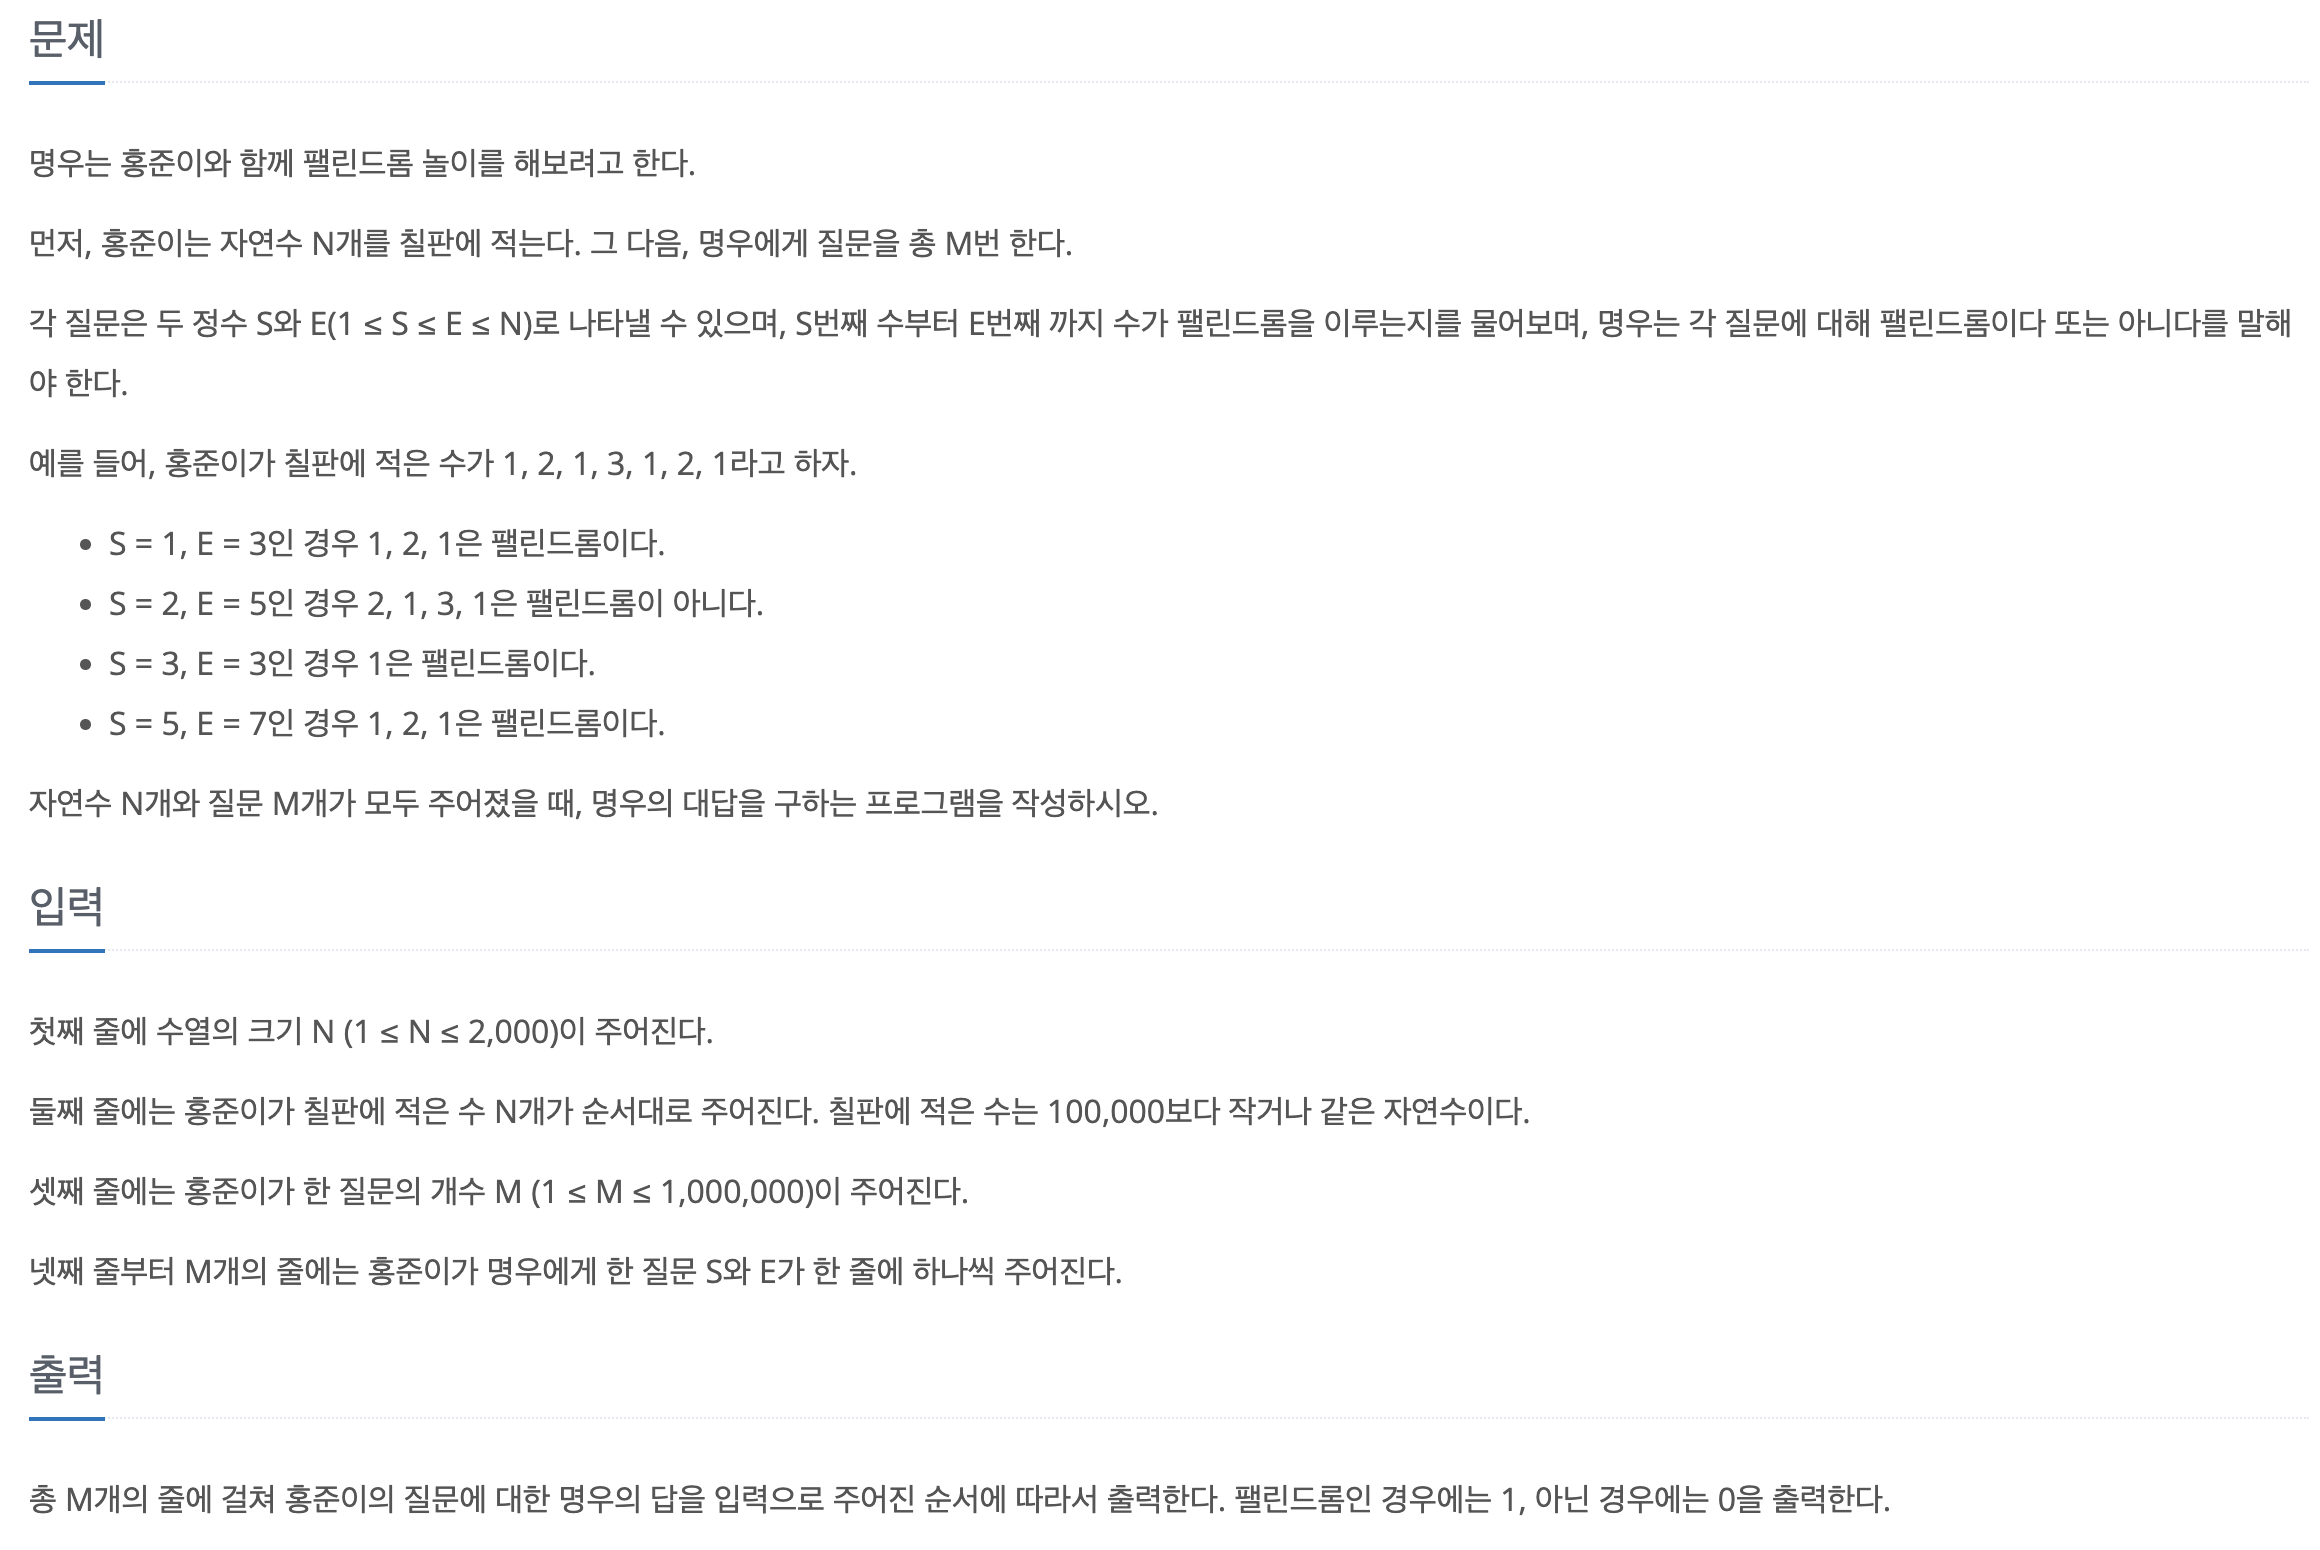
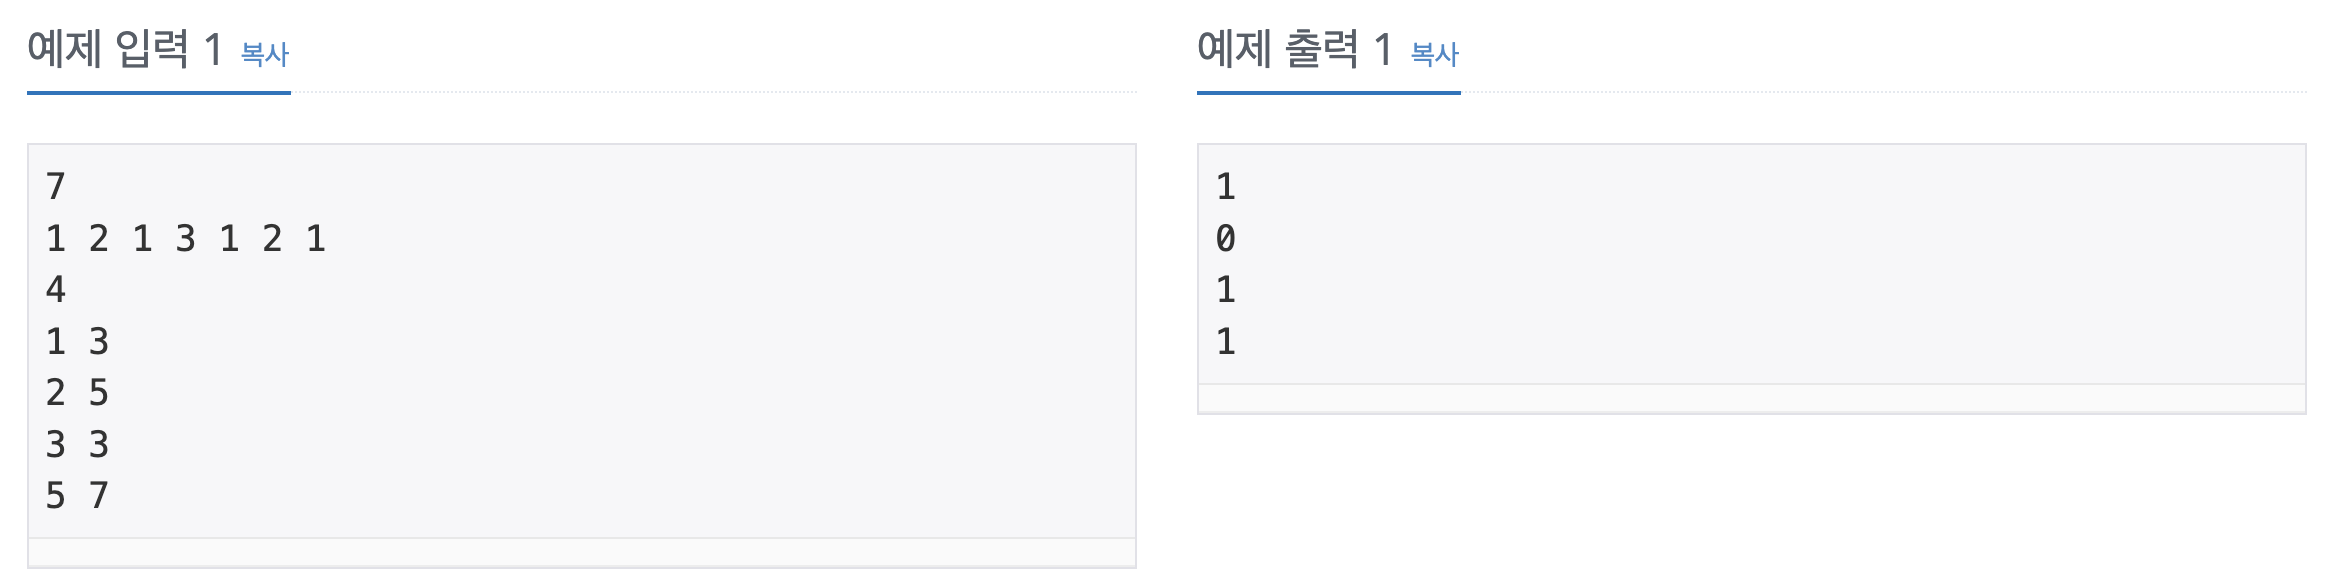

## Step
- 숫자배열의 시작 인덱스 별로, 펠린드롬인지 아닌지 저장할 배열이 필요하다
- 즉 크기로 봤을 때, n*n의 배열이 필요하다
- 이 중 사용되는 부분은 상삼각 행렬이다

#### 시작단계 구상
- 시작 인덱스와 끝 인덱스가 같다면, 무조건 펠린드롬이다
- 그럼 시작 인덱스와 끝 인덱스가 같은 곳을 1로 채워놓고 시작하자
- 1이 나왔으면 그 다음은 무조건 0이 나온다 (이미 펠린드롬인 숫자배열에서 한 숫자를 추가한거니까)
    - 틀린 접근 : 반례 -> 2222 에서 2라는 숫자가이 추가될경우

#### 막혀서 참고한 아이디어
- 시작 인덱스의 숫자와 끝 인덱스의 숫자가 같다면, 그 안의 숫자배열이 중요하다.
- 그 안의 숫자배열이 펠린드롬이면, 시작 숫자와 끝 숫자가 같기만 하다면 펠린드롬이다.

- 참고한 아이디어
- https://velog.io/@himi/%EB%B0%B1%EC%A4%80-10942.-%ED%8C%B0%EB%A6%B0%EB%93%9C%EB%A1%AC

## 제출 코드

In [60]:
import sys
#input = sys.stdin.readline
n = int(input())
num = [0]
num.extend(list(map(int, input().split())))
m = int(input())

dp = [[0]*(n+1) for _ in range(n+1)]

for i in range(n+1,0,-1): # 맨 아래행 부터 작업을 시작해야함 (사이 숫자배열이 펠린드롬이면 펠린드롬임을 가져오기 위해서)
    for j in range(i, n+1):
        if i == j:  # 1글자 탐색
            dp[i][j] = 1
        elif num[i] == num[j]: # 비교하고자하는 글자가 같다면(시작과 끝)
            if i+1 == j:   # 2글자면 펠린드롬
                dp[i][j] = 1
            else: # 3글자 이상이면 그 사이 숫자가 펠린드롬이면 펠린드롬 (a)cbc(a) 와 같은 경우
                if dp[i+1][j-1] == 1:
                    dp[i][j] = 1
for _ in range(m):
    a,b = map(int,input().split())
    print(dp[a][b])

7
1 2 1 3 1 2 1
4
1 3
1
2 5
0
3 3
1
5 7
1


In [61]:
dp

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1]]

# 문제 2
- 동물원
- https://www.acmicpc.net/problem/1309

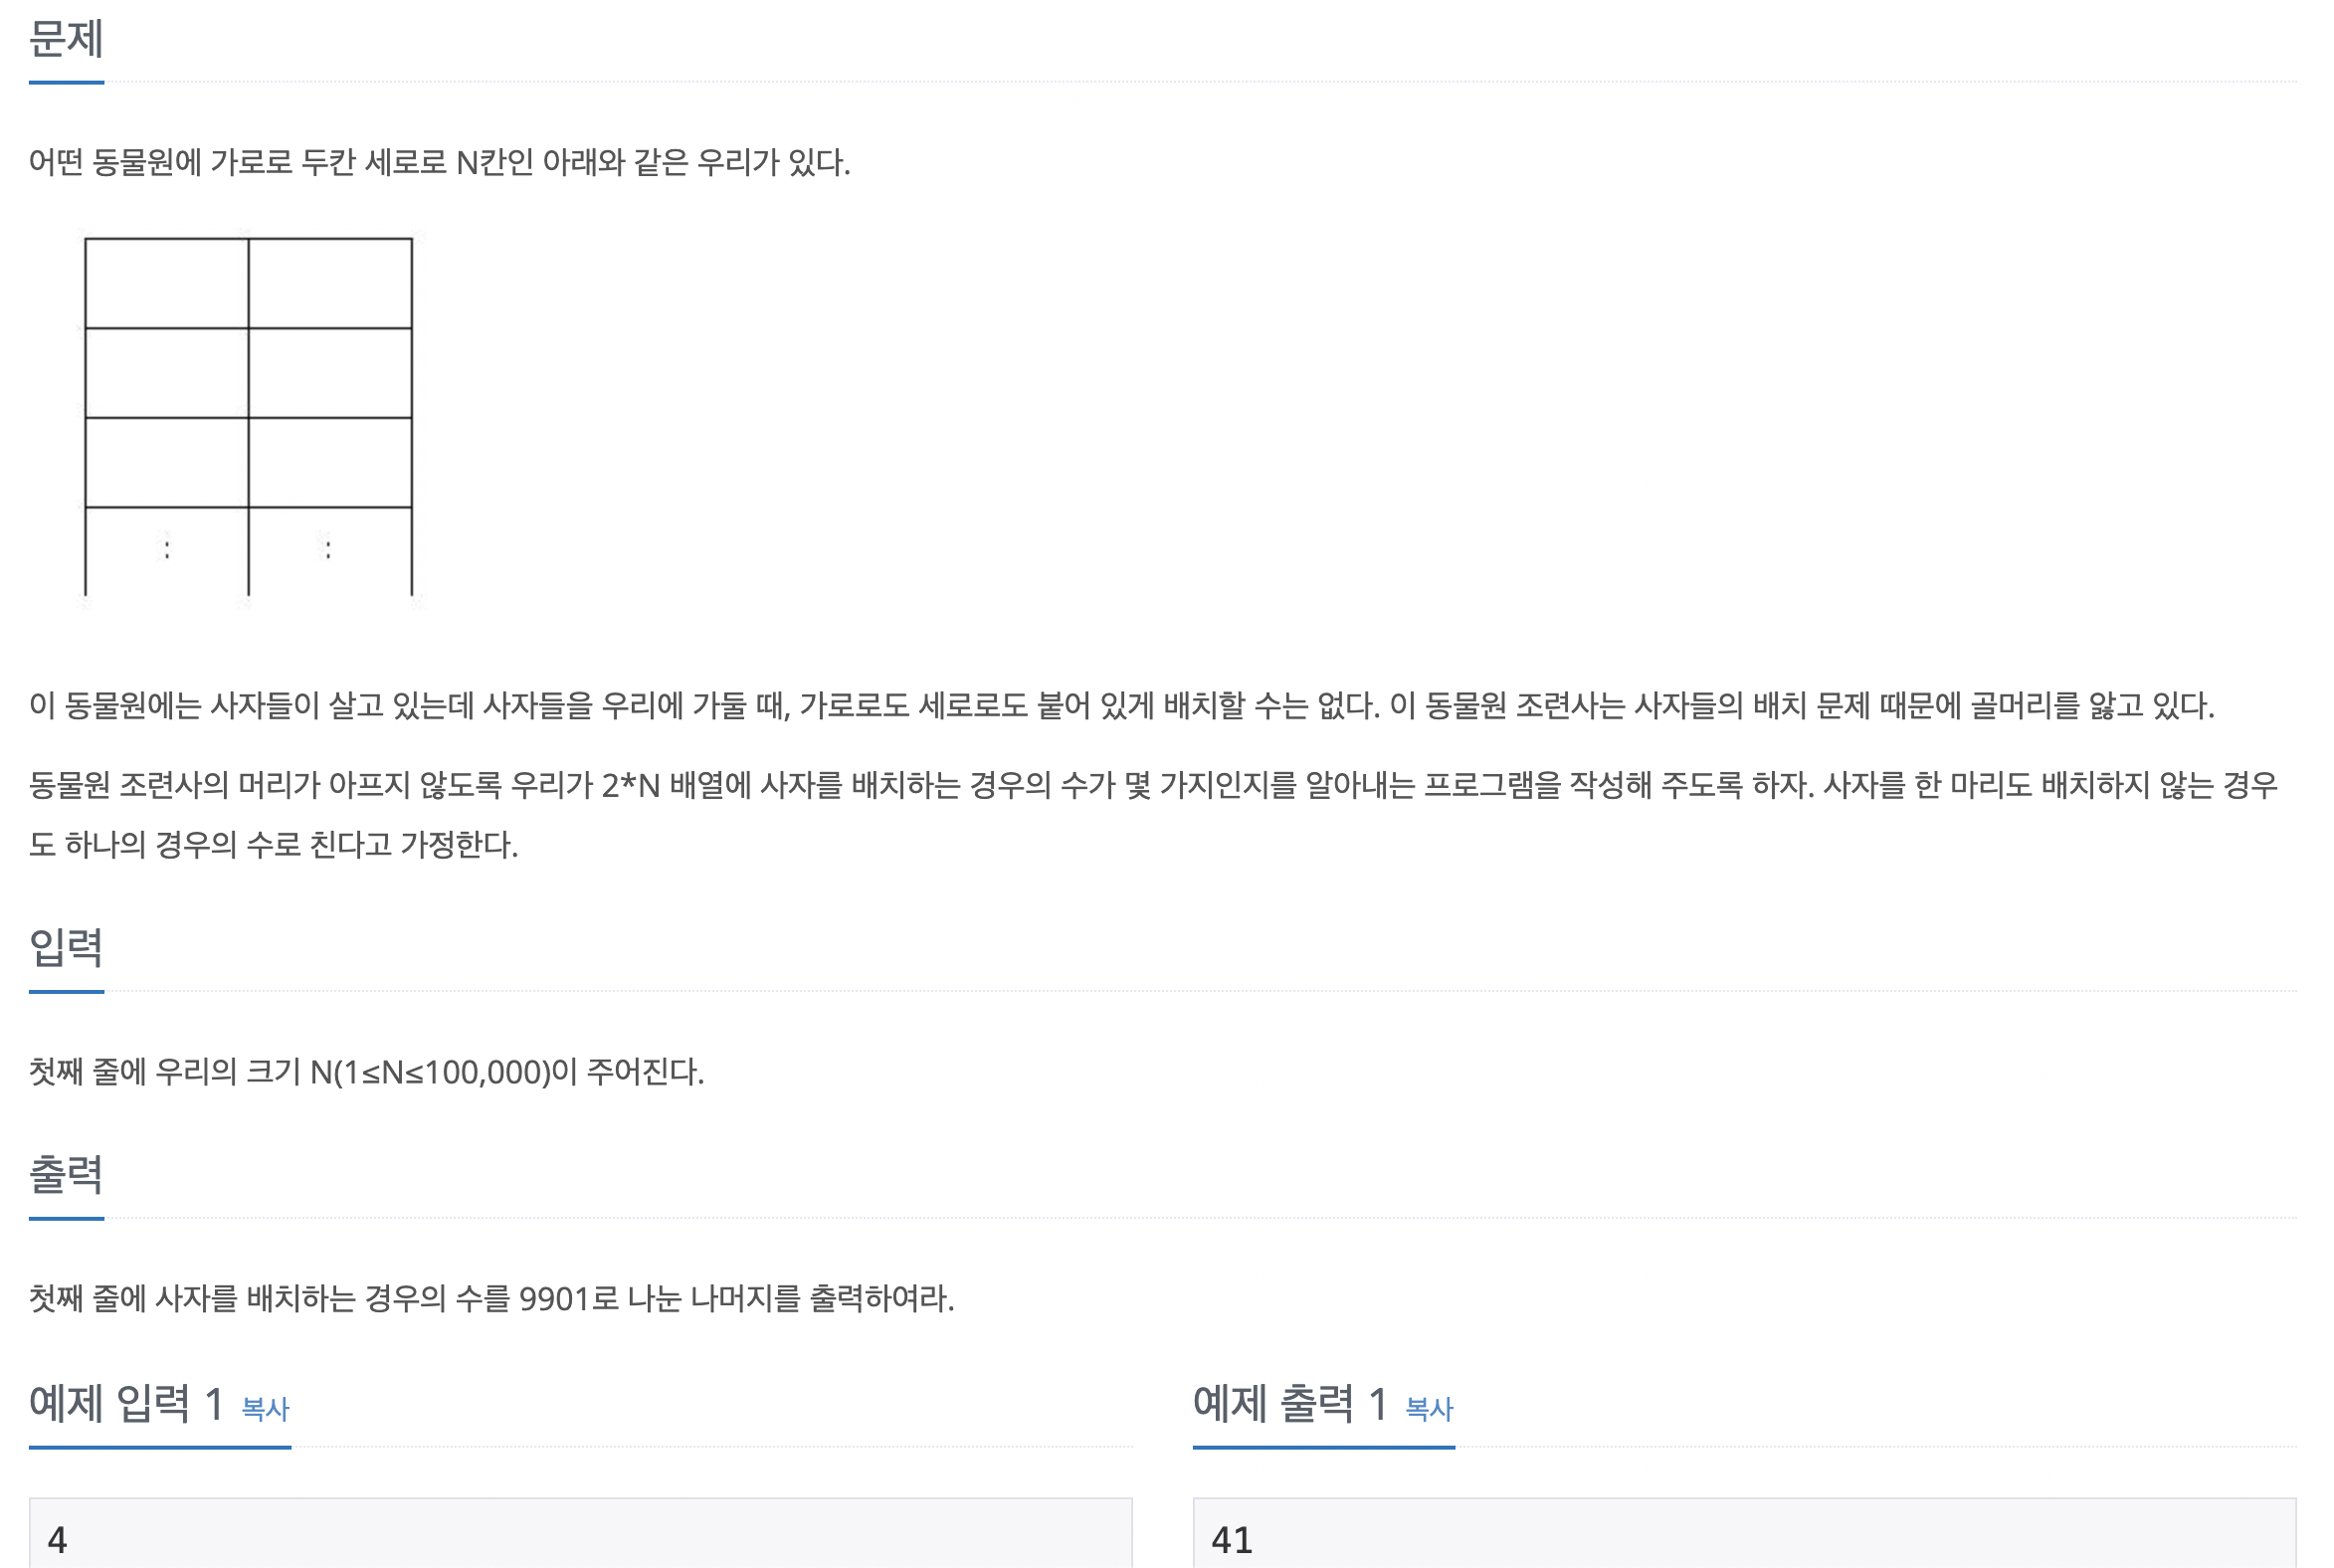

## Step
- 2x1의 칸이 점점 아래로 내려가면서 증가한다고 생각을 하자
- 점화식을 세워야 한다

### 칸이 추가될 때 선택지
- 1. 사자를 추가하지 않는다
- 2. 왼쪽칸에 사자를 추가한다  => 다음 선택에서는 오른쪽에 추가해야함
- 3. 오른쪽칸에 사자를 추가한다  => 다음 선택에서는 왼쪽에 추가해야함


- 참고코드
- https://animoto1.tistory.com/entry/%EB%B0%B1%EC%A4%80-1309-%EB%8F%99%EB%AC%BC%EC%9B%90-%ED%8C%8C%EC%9D%B4%EC%8D%AC-Python

In [30]:
n = int(input())
dp = [[0,0,0] for _ in range(n+1)]
dp[1][0] = 1
dp[1][1] = 1
dp[1][2] = 1

for i in range(2, n+1):
    dp[i][0] = (dp[i-1][0] + dp[i-1][1] + dp[i-1][2]) % 9901
    dp[i][1] = (dp[i-1][0] + dp[i-1][2]) % 9901  # 왼쪽에 추가하려면, 전 칸에서 오른쪽에 추가했을 경우를 더해준다
    dp[i][2] = (dp[i-1][0] + dp[i-1][1]) % 9901
    
print(sum(dp[n]) % 9901)

4
41


In [26]:
sum(dp[n])

41

# 문제 3
- 앱
- https://www.acmicpc.net/problem/7579

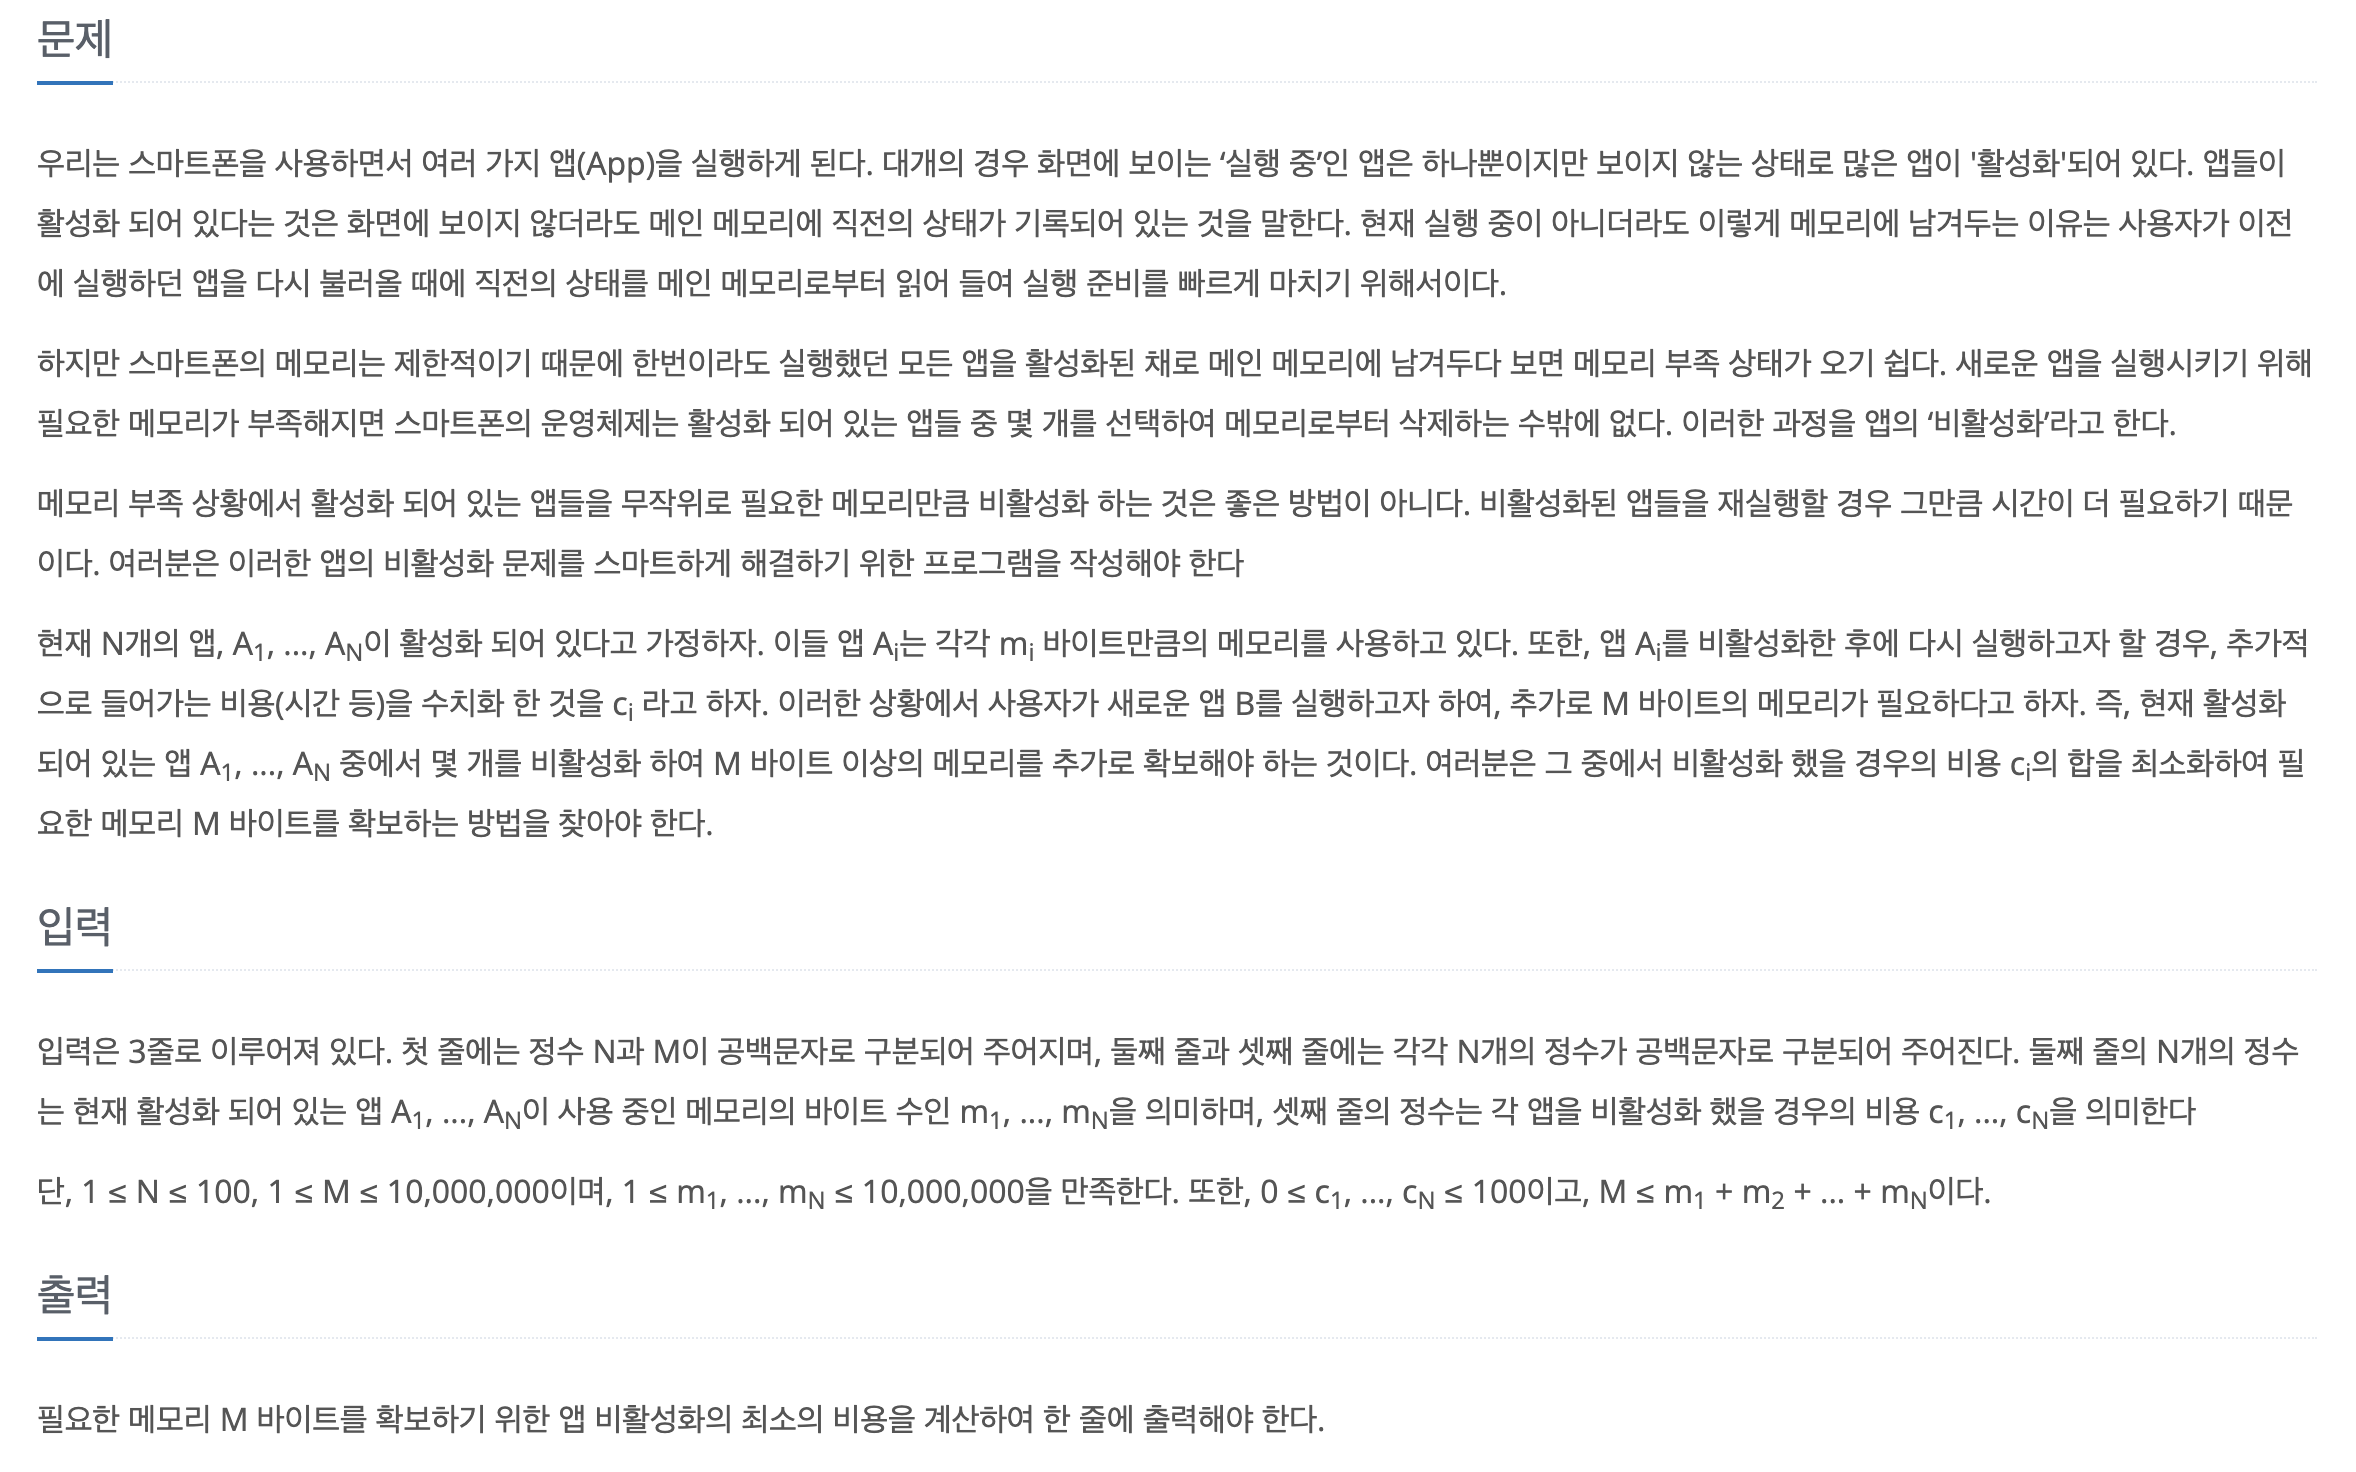
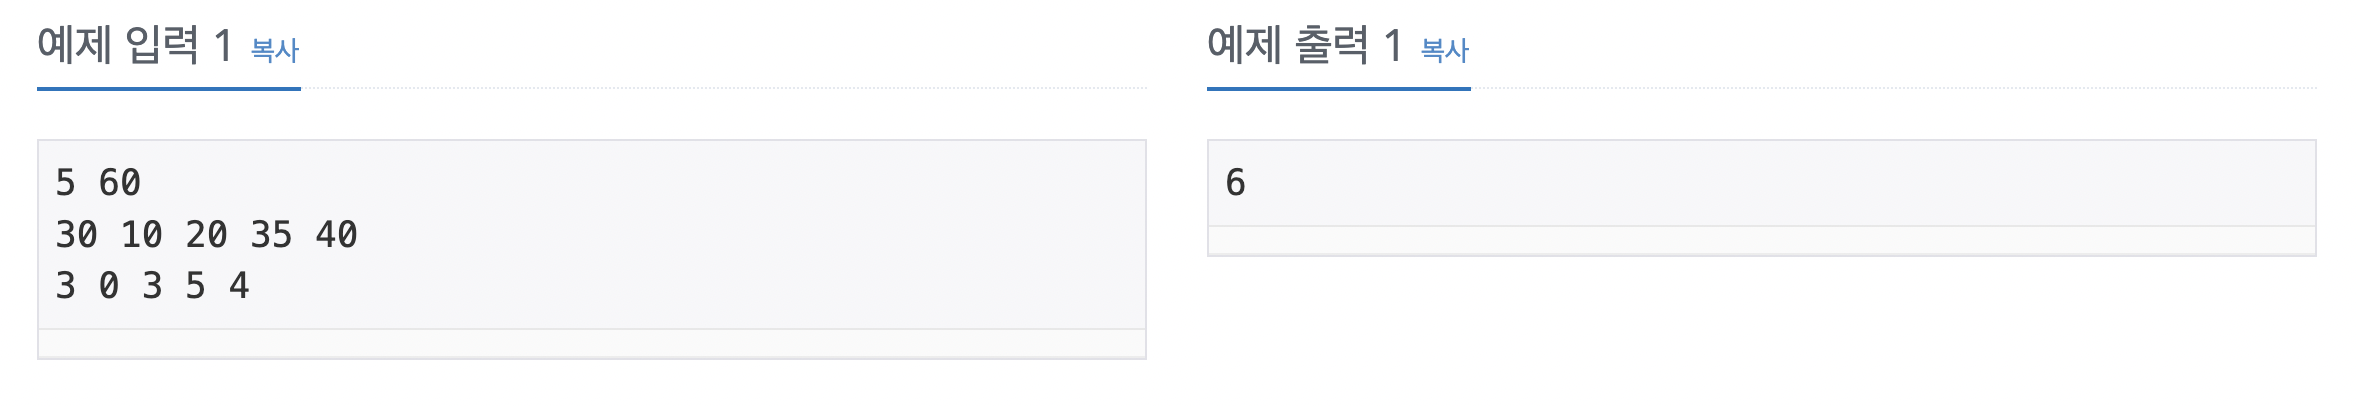

## Step
- 메모리 정보를 이용해서 dp 배열에 담고 점화식으로 갱신한다? .. 불가능해보임
- 비용으로 dp 배열에 담고 점화식으로 갱신해보자
- 비용별 최대 확보할 수 있는 메모리를 저장해보자
- 비용의 최대 값 => 주어진 cost 배열의 합


- 이중 for문
- (메모리,코스트) 쌍이 주어지면서 dp 이차원 배열에 값 추가
    - 행은 메모리 경우의 수, 열은 조합 할 수 있는 cost 수

In [14]:
n,m = map(int, input().split())
memory = [0] + list(map(int, input().split()))
cost = [0] + list(map(int, input().split()))
dp = [[0 for _ in range(sum(cost)+1)] for _ in range(n+1)]

ans = sum(cost) # 가능한 최대 값

for i in range(1, n+1):
    for j in range(len(dp[0])):
        if cost[i] > j:            # 메모리의 cost가 현재 체크하는 cost보다 크다면, 이 메모리는 비활성화 하지 못함
            dp[i][j] = dp[i-1][j]
            
        else:                      # 그렇지 않다면, 이 메모리를 비활성화 하지 않는것이 유리한지 하는 것이 유리한지 따져본다
            dp[i][j] = max(dp[i-1][j], dp[i-1][j-cost[i]] + memory[i])
            
        if dp[i][j] >= m:          # 이러한 과정중에, 우리가 확보하고자 하는 메모리를 확보할 수 있다면, 그 값 저장
            ans = min(ans, j)      # j가 cost이니까, 최소의 cost가 나오면 갱신
            
print(ans)

5 60
30 10 20 35 40
3 0 3 5 4
6


In [15]:
dp

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
 [10, 10, 10, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40],
 [10, 10, 10, 40, 40, 40, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60],
 [10, 10, 10, 40, 40, 45, 60, 60, 75, 75, 75, 95, 95, 95, 95, 95],
 [10, 10, 10, 40, 50, 50, 60, 80, 80, 85, 100, 100, 115, 115, 115, 135]]